In [24]:
import pandas as pd
import numpy
import networkx as nx 
import dynetx as dn
import matplotlib.pyplot as plt

### IDEAS

1. Temporal Change of the network (Stable of niet?), property changes
2. isolate nodes
3. uniqueness of nodes in giant component
4. (m,n) anonymity
5. Anonymity measurement with snapshot of temporal networks/continuous
6. One timestamp at a time

### Anonymity Implementation

In [10]:
# G = dn.read_snapshots("data/ia-contacts_hypertext2009.edges", nodetype=int, timestamptype=int)
# slice = G.time_slice(t_from=20, t_to=5000)

In [47]:
edge_list_file = 'data/ia-reality-call.edges'
edges = []

with open(edge_list_file, 'r') as file:
    for line in file:
        source, target, timestamp = map(int, line.strip().split(',')[:3])
        edges.append((source, target, timestamp))

# Create a directed temporal graph using networkx
G = nx.DiGraph()

# Add edges with timestamps
for edge in edges:
    G.add_edge(edge[0], edge[1], timestamp=edge[2])

In [49]:
timestamp_1 = 1098357366
timestamp_2 = 1100699962
timestamp_3 = 1103835806

snapshot_1 = G.subgraph([node for node, data in G.nodes(data=True) if data.get('timestamp', 0) <= timestamp_1])
snapshot_2 = G.subgraph([node for node, data in G.nodes(data=True) if data.get('timestamp', 0) <= timestamp_2])
snapshot_3 = G.subgraph([node for node, data in G.nodes(data=True) if data.get('timestamp', 0) <= timestamp_3])

In [54]:
timestamps_of_interest = [1098357366, 1100699962, 1103835806]

for timestamp in timestamps_of_interest:
    subgraph_at_timestamp = G.subgraph(
        [node for node, data in G.nodes(data=True) if data.get('timestamp', 0) <= timestamp]
    )

    # Print subgraph properties
    print(f"Timestamp {timestamp}: Number of nodes = {subgraph_at_timestamp.number_of_nodes()}, Number of edges = {subgraph_at_timestamp.number_of_edges()}")

Timestamp 1098357366: Number of nodes = 6809, Number of edges = 9484
Timestamp 1100699962: Number of nodes = 6809, Number of edges = 9484
Timestamp 1103835806: Number of nodes = 6809, Number of edges = 9484


In [51]:
# snapshot 1 properties (t=5000)
print(snapshot_1.number_of_nodes())
print(snapshot_1.number_of_edges())
print(nx.density(snapshot_1))
# Infinite paths because not strongly connected

print(snapshot_3.number_of_nodes())
print(snapshot_3.number_of_edges())
print(nx.density(snapshot_3))

6809
9484
0.00020459200764040266
6809
9484
0.00020459200764040266


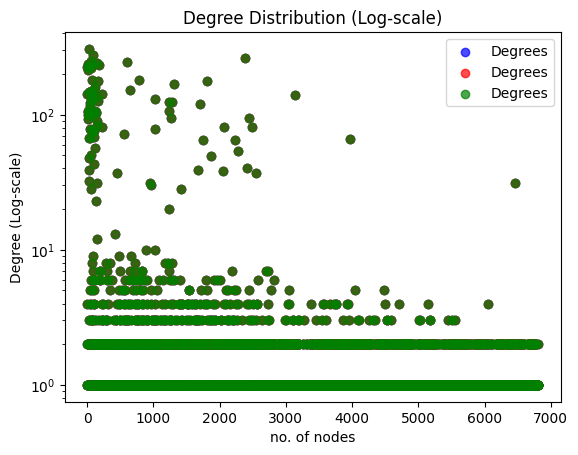

In [53]:
# Compute the degree distribution
degree_sequence1 = [degree for node, degree in snapshot_1.degree()]
degree_sequence2 = [degree for node, degree in snapshot_2.degree()]
degree_sequence3 = [degree for node, degree in snapshot_3.degree()]

# Plot the degree distribution histogram
plt.scatter(range(len(degree_sequence1)), degree_sequence1, color='blue', alpha=0.7, label='Degrees')
plt.scatter(range(len(degree_sequence2)), degree_sequence2, color='red', alpha=0.7, label='Degrees')
plt.scatter(range(len(degree_sequence3)), degree_sequence3, color='green', alpha=0.7, label='Degrees')
plt.yscale('log')  # Log-scale y-axis

plt.title("Degree Distribution (Log-scale)")
plt.xlabel("no. of nodes")
plt.ylabel("Degree (Log-scale)")
plt.legend()
plt.show()

In [56]:
ego_properties = {}

for node in snapshot_1.nodes():
    ego_net = nx.ego_graph(G, node)
    
    n = ego_net.number_of_nodes()
    m = ego_net.number_of_edges()
    
    ego_properties[node] = (n, m)